In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# load weights into new model
model  = load_model("MNIST.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


(269, 351, 3)
Total Number of Contours: 2
counter Area_1 is 21904.5:
counter Area_2 is 13257.5:


Text(0.5, 1.0, 'Countoured')

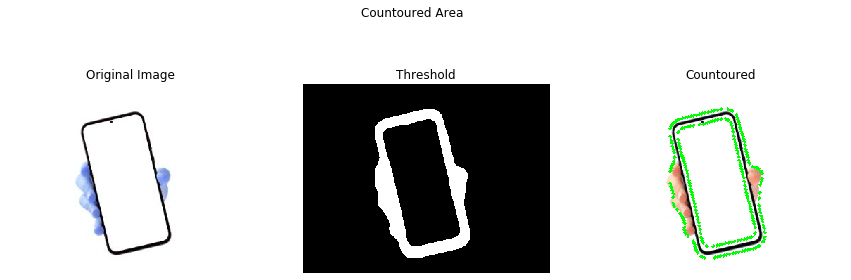

In [42]:
import numpy as np
import cv2

image = cv2.imread("1.jpg")

img = image.copy()

print(img.shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (35, 35), 0)
ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

cv2.putText(img_white, "total_countors : " + str(len(contours)),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

print("Total Number of Contours:",len(contours))

i = 0

for cont in contours:
    i = i+1
    print("counter Area_{0} is {1}:".format(i,cv2.contourArea(cont)))

for contour in contours:
    cv2.drawContours(img, contour, -1, (0, 255, 0), 3)
    
    
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Countoured Area')

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title("Original Image")

ax[1].imshow(thresh1,cmap="gray")
ax[1].axis('off')
ax[1].set_title("Threshold")

ax[2].imshow(img,cmap="gray")
ax[2].axis('off')
ax[2].set_title("Countoured")



In [14]:
import numpy as np
import cv2

#change to your video path
cap = cv2.VideoCapture(0)

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    x, y, w, h = 0, 0, 300, 300
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (35, 35), 0)
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    
    
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        
        if cv2.contourArea(contour) > 2500:
            
            x, y, w, h = cv2.boundingRect(contour)
            
            newImage = thresh1[y:y + h, x:x + w]
            newImage = cv2.resize(newImage, (28, 28))
            
            # Reshape
            newImage = newImage.reshape(1,28, 28, 1)
            
            # prepare pixel data
            newImage = newImage.astype('float32')
            newImage = newImage / 255.0
            
            predict_value = model.predict(newImage)[0]
               
            pred =  np.argmax(predict_value)

    x, y, w, h = 0, 0, 300, 300
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    cv2.putText(frame, "Prediction : " + str(pred), (10, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    # Display the resulting frame
    cv2.imshow("Originl",frame)
    
    cv2.imshow("threshold",thresh1)
    
    #cv2.imshow('Croped frame',imgCropped)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()